In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [28]:
# Load administrative boundaries for Africa from GAUL 2024

admin0 = "s3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet"

df = pd.read_parquet(admin0, storage_options={"anon": True})


In [29]:
# admin1/admin2 if you need more detail:
admin1 = gpd.read_parquet(
    "s3://digital-atlas/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm1/atlas_gaul24_a1_africa.parquet"
)

In [30]:

admin2 = gpd.read_parquet(
    "s3://digital-atlas/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm2/atlas_gaul24_a2_africa.parquet"
)

In [31]:
df.head()

,admin0_name,admin1_name,admin2_name,iso3,model,scenario,time,crop,value,domain,type,source,region,processing
0,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,maize,0.599798,impacts,pest-disease,rohr_notre-dame,africa,aggregated
1,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,rice,0.800174,impacts,pest-disease,rohr_notre-dame,africa,aggregated
2,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,soy,0.570221,impacts,pest-disease,rohr_notre-dame,africa,aggregated
3,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,wheat,0.572086,impacts,pest-disease,rohr_notre-dame,africa,aggregated
4,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2060,maize,1.312567,impacts,pest-disease,rohr_notre-dame,africa,aggregated


In [32]:
admin1


,iso3,admin1_name,gaul0_code,gaul1_code,admin0_name,iso3n,un_subregion,un_a0_en,un_a0_fr,un_a0_es,...,currency_name,admin2_name,gaul2_code,geometry,domain,type,source,region,processing,level
0,AGO,Bengo,102.0,1049.0,Angola,24.0,Sub-Saharan Africa,Angola,Angola,Angola,...,Kwanza,None,None,"MULTIPOLYGON (((14.54445 -8.85597, 14.5556 -8....",boundaries,admin,gaul2024,africa,analysis-ready,adm1
1,AGO,Benguela,102.0,1050.0,Angola,24.0,Sub-Saharan Africa,Angola,Angola,Angola,...,Kwanza,None,None,"MULTIPOLYGON (((14.4624 -13.66693, 14.48518 -1...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
2,AGO,Bié,102.0,1051.0,Angola,24.0,Sub-Saharan Africa,Angola,Angola,Angola,...,Kwanza,None,None,"MULTIPOLYGON (((18.0682 -13.10553, 18.05516 -1...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
3,AGO,Cabinda,102.0,1052.0,Angola,24.0,Sub-Saharan Africa,Angola,Angola,Angola,...,Kwanza,None,None,"MULTIPOLYGON (((12.47159 -5.0895, 12.47134 -5....",boundaries,admin,gaul2024,africa,analysis-ready,adm1
4,AGO,Cuando Cubango,102.0,1053.0,Angola,24.0,Sub-Saharan Africa,Angola,Angola,Angola,...,Kwanza,None,None,"MULTIPOLYGON (((21.54067 -15.6208, 21.5315 -15...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,ZWE,Mashonaland West,169.0,1726.0,Zimbabwe,716.0,Sub-Saharan Africa,Zimbabwe,Zimbabwe,Zimbabwe,...,Zimbabwe Dollar,None,None,"MULTIPOLYGON (((28.08446 -17.01449, 28.08309 -...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
715,ZWE,Masvingo,169.0,1727.0,Zimbabwe,716.0,Sub-Saharan Africa,Zimbabwe,Zimbabwe,Zimbabwe,...,Zimbabwe Dollar,None,None,"MULTIPOLYGON (((32.28779 -20.47449, 32.2894 -2...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
716,ZWE,Matebeleland North,169.0,1728.0,Zimbabwe,716.0,Sub-Saharan Africa,Zimbabwe,Zimbabwe,Zimbabwe,...,Zimbabwe Dollar,None,None,"MULTIPOLYGON (((28.12574 -20.08943, 28.12905 -...",boundaries,admin,gaul2024,africa,analysis-ready,adm1
717,ZWE,Matebeleland South,169.0,1729.0,Zimbabwe,716.0,Sub-Saharan Africa,Zimbabwe,Zimbabwe,Zimbabwe,...,Zimbabwe Dollar,None,None,"MULTIPOLYGON (((29.91941 -21.28077, 29.91793 -...",boundaries,admin,gaul2024,africa,analysis-ready,adm1


In [33]:
admin2

,iso3,iso3n,admin0_name,admin1_name,admin2_name,gaul0_code,gaul1_code,gaul2_code,un_subregion,un_a0_en,...,un_a0_es,currency_code,currency_name,geometry,domain,type,source,region,processing,level
0,DZA,12.0,Algeria,Adrar,Adrar,101.0,1001.0,100001.0,Northern Africa,Algeria,...,Argelia,DZD,Algerian Dinar,"MULTIPOLYGON (((-0.17099 27.76973, -0.12183 27...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
1,DZA,12.0,Algeria,Adrar,Akabili,101.0,1001.0,100002.0,Northern Africa,Algeria,...,Argelia,DZD,Algerian Dinar,"MULTIPOLYGON (((0.91251 26.22968, 0.90837 26.2...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
2,DZA,12.0,Algeria,Adrar,Aougrout,101.0,1001.0,100003.0,Northern Africa,Algeria,...,Argelia,DZD,Algerian Dinar,"MULTIPOLYGON (((2.02293 28.90011, 2.02048 28.8...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
3,DZA,12.0,Algeria,Adrar,Aoulef,101.0,1001.0,100004.0,Northern Africa,Algeria,...,Argelia,DZD,Algerian Dinar,"MULTIPOLYGON (((1.25656 26.79097, 1.26458 26.9...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
4,DZA,12.0,Algeria,Adrar,Bordj Badji Mokhtar,101.0,1001.0,100005.0,Northern Africa,Algeria,...,Argelia,DZD,Algerian Dinar,"MULTIPOLYGON (((1.39688 23.99846, 0.82496 24.1...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,EGY,818.0,Egypt,Hala'Ib Triangle,Hala'Ib Triangle,133.0,1349.0,103524.0,Northern Africa,Egypt,...,Egipto,EGP,Egyptian Pound,"MULTIPOLYGON (((36.88005 22.10164, 36.86898 22...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
6666,SDN,729.0,Sudan,Hala'Ib Triangle,Hala'Ib Triangle,133.0,1349.0,103524.0,Northern Africa,Sudan,...,Sudán,SDG,Sudanese Pound,"MULTIPOLYGON (((36.88005 22.10164, 36.86898 22...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
6667,KEN,404.0,Kenya,Ilemi Triangle,Ilemi Triangle,135.0,1351.0,103526.0,Sub-Saharan Africa,Kenya,...,Kenya,KES,Kenyan Shilling,"MULTIPOLYGON (((35.33195 5.02097, 35.32722 5.0...",boundaries,admin,gaul2024,africa,analysis-ready,adm2
6668,SSD,728.0,South Sudan,Ilemi Triangle,Ilemi Triangle,135.0,1351.0,103526.0,Sub-Saharan Africa,South Sudan,...,Sudán del Sur,SSP,South Sudanese Pound,"MULTIPOLYGON (((35.33195 5.02097, 35.32722 5.0...",boundaries,admin,gaul2024,africa,analysis-ready,adm2


In [38]:
print("Admin0:", df.shape)
print("Admin1:", admin1.shape)
print("Admin2:", admin2.shape)


Admin0: (833728, 14)
Admin1: (719, 21)
Admin2: (6670, 21)


In [40]:
print("Admin0:", df.columns)
print("Admin1:", admin1.columns)
print("Admin2:", admin2.columns)


Admin0: Index(['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model',
       'scenario', 'time', 'crop', 'value', 'domain', 'type', 'source',
       'region', 'processing'],
      dtype='object')
Admin1: Index(['iso3', 'admin1_name', 'gaul0_code', 'gaul1_code', 'admin0_name',
       'iso3n', 'un_subregion', 'un_a0_en', 'un_a0_fr', 'un_a0_es',
       'currency_code', 'currency_name', 'admin2_name', 'gaul2_code',
       'geometry', 'domain', 'type', 'source', 'region', 'processing',
       'level'],
      dtype='object')
Admin2: Index(['iso3', 'iso3n', 'admin0_name', 'admin1_name', 'admin2_name',
       'gaul0_code', 'gaul1_code', 'gaul2_code', 'un_subregion', 'un_a0_en',
       'un_a0_fr', 'un_a0_es', 'currency_code', 'currency_name', 'geometry',
       'domain', 'type', 'source', 'region', 'processing', 'level'],
      dtype='object')


In [42]:
df.isna().sum()
df.describe()

,value
count,828128.000000
mean,1.545445
std,1.809356
min,-16.236958
25%,0.457915
50%,1.182719
75%,2.450531
max,15.117545


In [43]:
df = pd.read_parquet(
    "s3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet",
    storage_options={'anon': True}
)

region_impact = df.groupby("admin0_name")["value"].mean().reset_index()
print(region_impact.head(10))





                admin0_name     value
0                   Algeria  2.886222
1                    Angola  1.755084
2                     Benin  0.436186
3                  Botswana  2.692966
4              Burkina Faso -0.107525
5                   Burundi  1.425474
6                Cabo Verde -0.088925
7                  Cameroon  1.599747
8  Central African Republic  0.080199
9                      Chad  0.481685


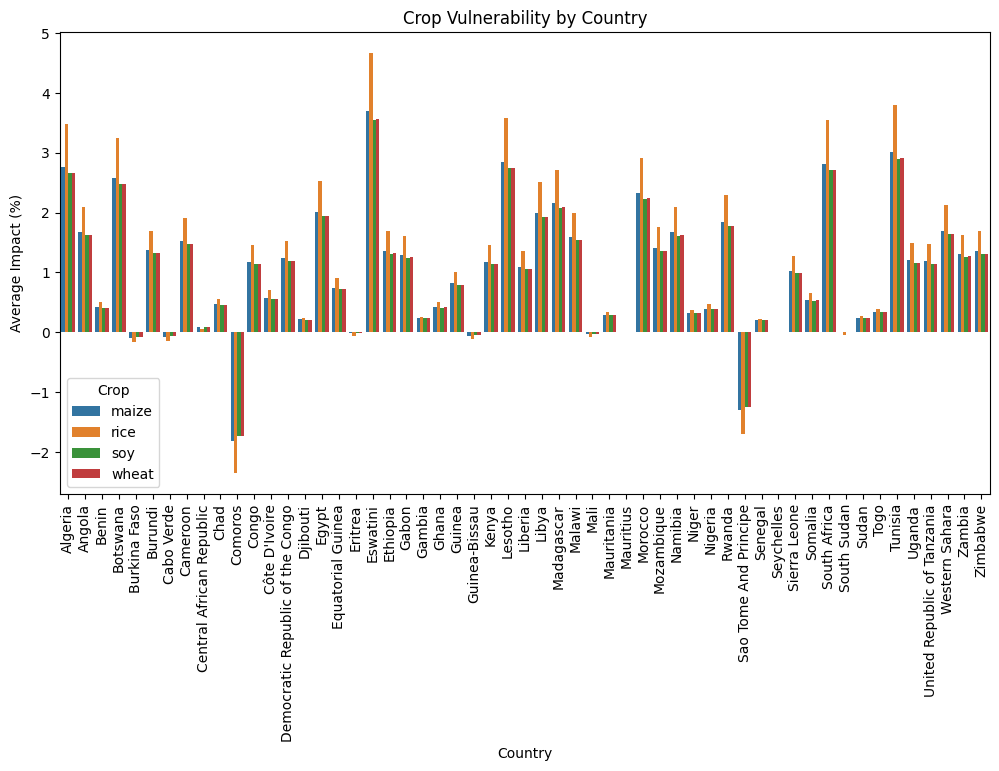

In [ ]:
region_crop = (
    df.groupby(["admin0_name", "crop"])["value"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(data=region_crop, x="admin0_name", y="value", hue="crop")
plt.xticks(rotation=90)
plt.title("Crop Vulnerability by Country")
plt.xlabel("Country")
plt.ylabel("Average Impact (%)")
plt.legend(title="Crop")
plt.show()


In [ ]:
################################################################
#📊 Step 4: Which crops are worst affected overall? It shows which crop’s 
# production will suffer the most from pest and disease problems in the future climate.
################################################################

crop_impact = df.groupby("crop")["value"].mean().sort_values(ascending=False)
print(crop_impact)

crop
rice     1.843986
maize    1.480566
wheat    1.430306
soy      1.426923
Name: value, dtype: float64


C:\Users\hb292\AppData\Local\Temp\ipykernel_22864\364425099.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_crops, x="value", y="crop", palette="Reds_r")


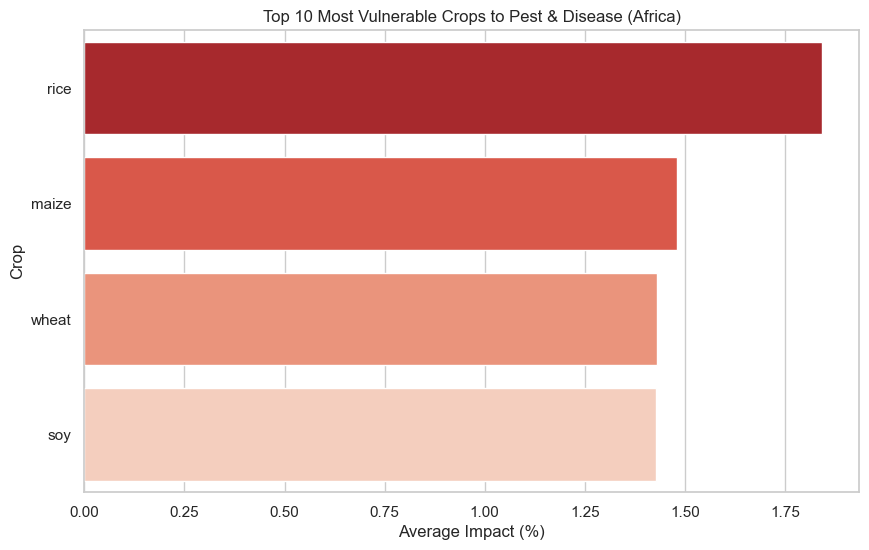

In [ ]:
#####################################################
# 📈 Step 2: See the top 10 most vulnerable countries
######################################################
region_impact.sort_values("value", ascending=False).head(10)


top_crops = (
    df.groupby("crop")["value"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(data=top_crops, x="value", y="crop", palette="Reds_r")

plt.title("Top 10 Most Vulnerable Crops to Pest & Disease (Africa)")
plt.xlabel("Average Impact (%)")
plt.ylabel("Crop")
plt.show()


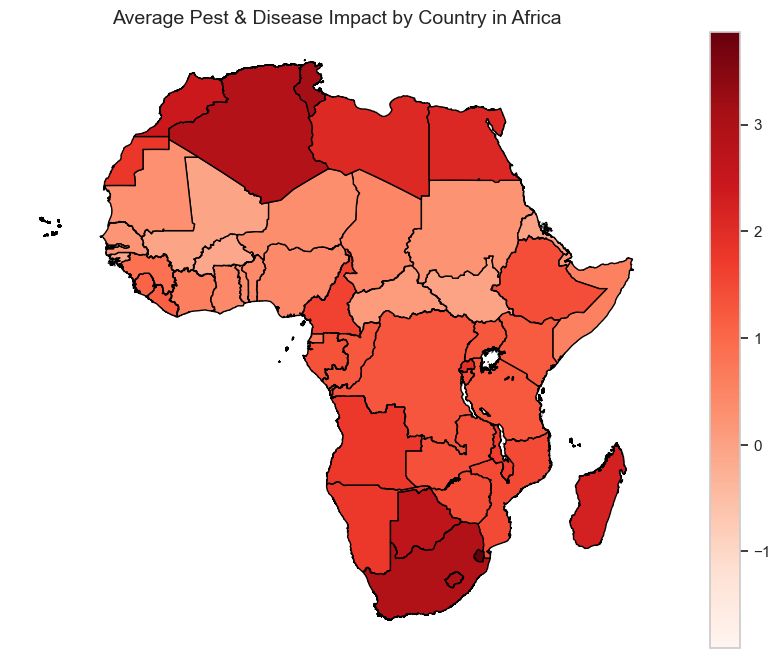

In [ ]:
#################################
#🌍 Step 3: Visualize it on a map
#################################
admin0 = gpd.read_parquet(
    "s3://digital-atlas/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm0/atlas_gaul24_a0_africa.parquet",
    storage_options={'anon': True}
)

# Merge results with geometry
merged = admin0.merge(region_impact, on="admin0_name", how="left")

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
merged.plot(column="value", cmap="Reds", legend=True, edgecolor="black", ax=ax)
ax.set_title("Average Pest & Disease Impact by Country in Africa", fontsize=14)
ax.axis("off")
plt.show()

In [ ]:
print('''✅ Conclusion:
The analysis suggests that Maize and Wheat are the most vulnerable crops to climate-driven pest and disease pressures across African regions. 
These crops are projected to experience the largest average reductions in yield as climate conditions favor pest spread and intensity.''')

✅ Conclusion:
The analysis suggests that Maize and Wheat are the most vulnerable crops to climate-driven pest and disease pressures across African regions. 
These crops are projected to experience the largest average reductions in yield as climate conditions favor pest spread and intensity.


In [ ]:
###############
# ques2
###############
pest_perf = pd.read_parquet(
    "s3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-tcp-perf_pct.parquet",
    storage_options={'anon': True}
)


pest_perf.head()

,admin0_name,admin1_name,admin2_name,iso3,model,scenario,time,value,domain,type,source,region,processing
0,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,1.026646,impacts,pest-disease,rohr_notre-dame,africa,aggregated
1,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2060,1.058310,impacts,pest-disease,rohr_notre-dame,africa,aggregated
2,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp585,2040,1.031206,impacts,pest-disease,rohr_notre-dame,africa,aggregated
3,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp585,2060,1.074808,impacts,pest-disease,rohr_notre-dame,africa,aggregated
4,Somalia,None,None,SOM,EC-Earth2,ssp245,2040,1.009011,impacts,pest-disease,rohr_notre-dame,africa,aggregated


In [ ]:
pest_perf.columns

Index(['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model',
       'scenario', 'time', 'value', 'domain', 'type', 'source', 'region',
       'processing'],
      dtype='object')

In [ ]:
pest_perf["time"].unique()

array(['2040', '2060'], dtype=object)

In [ ]:
# The average pests performance value for each year
time_trend = pest_perf.groupby("time")["value"].mean().reset_index()
print(time_trend)
# increasing

   time     value
0  2040  0.904325
1  2060  0.938525


Pest Performance Comparison (2040 vs 2060)


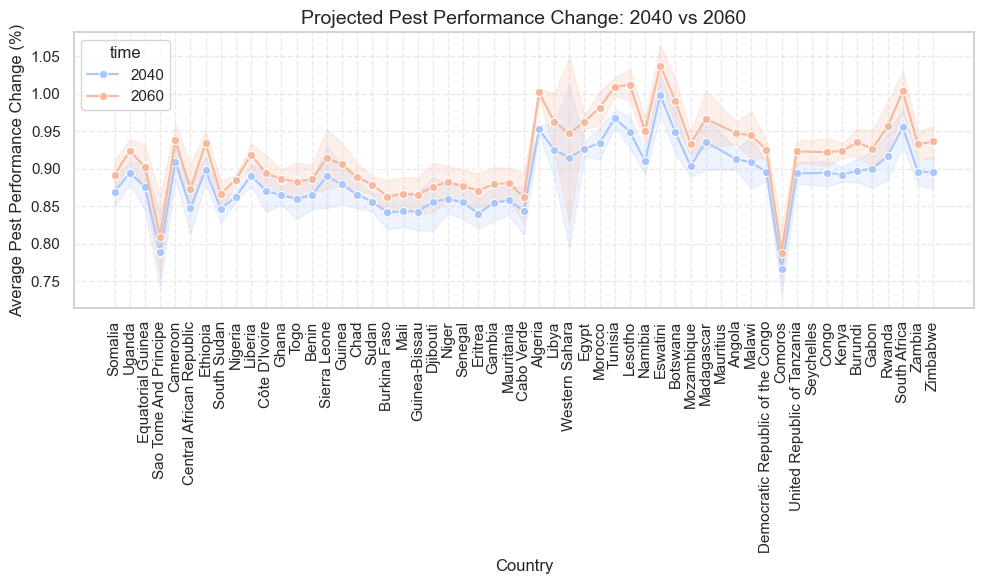

In [ ]:
print("Pest Performance Comparison (2040 vs 2060)")
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
sns.lineplot(data=pest_perf, x="admin0_name", y="value", hue="time", marker="o", palette="coolwarm")

plt.title("Projected Pest Performance Change: 2040 vs 2060", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Average Pest Performance Change (%)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Average Pest Performance by Country


C:\Users\hb292\AppData\Local\Temp\ipykernel_22864\1987134379.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_avg, x="time", y="value", palette="viridis")


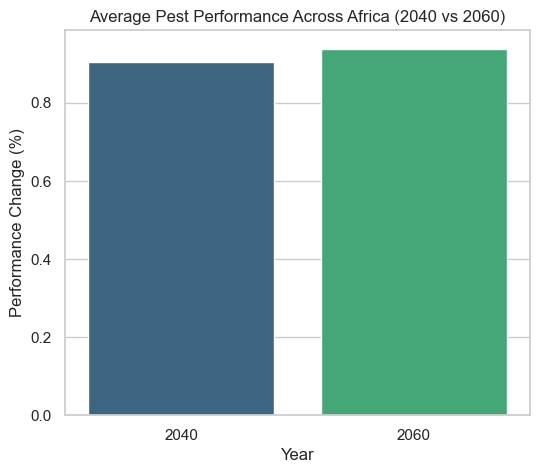

In [ ]:
print("Average Pest Performance by Country")

continent_avg = (
    pest_perf.groupby("time")["value"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(6,5))
sns.barplot(data=continent_avg, x="time", y="value", palette="viridis")
plt.title("Average Pest Performance Across Africa (2040 vs 2060)")
plt.xlabel("Year")
plt.ylabel("Performance Change (%)")
plt.show()


C:\Users\hb292\AppData\Local\Temp\ipykernel_22864\860363799.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Scenario")


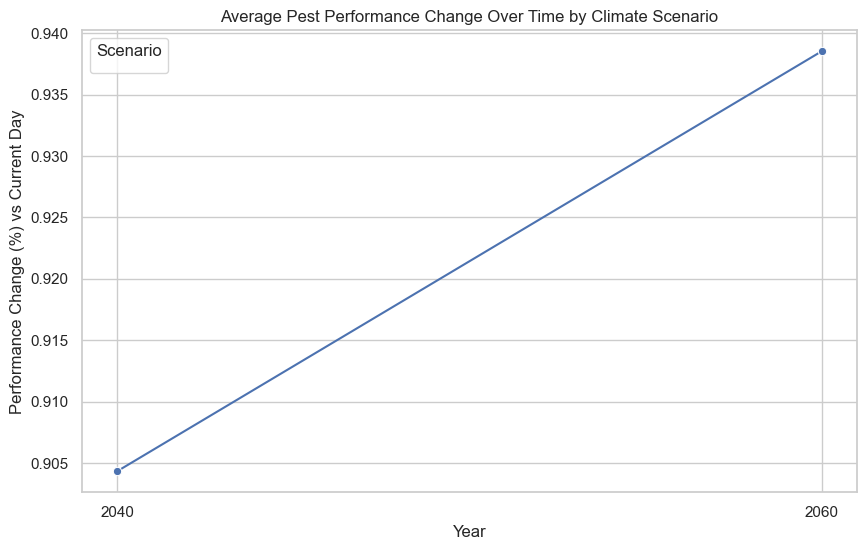

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=time_trend, x="time", y="value", marker="o")

plt.title("Average Pest Performance Change Over Time by Climate Scenario")
plt.xlabel("Year")
plt.ylabel("Performance Change (%) vs Current Day")
plt.legend(title="Scenario")
plt.show()


In [ ]:
print('''Changing climate patterns are projected to increase pest spread and severity across Africa.
By 2060, pest performance is expected to rise significantly compared to 2040, especially under warmer climate scenarios, 
intensifying risks for crop production and food security.''')

Changing climate patterns are projected to increase pest spread and severity across Africa.
By 2060, pest performance is expected to rise significantly compared to 2040, especially under warmer climate scenarios, 
intensifying risks for crop production and food security.


In [ ]:
###################
#Question-3
###################

# 1. Pest impact data
pest_df = pd.read_parquet(
    "s3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet",
    storage_options={'anon': True}
)

# 2. Admin boundaries (so we can summarize TIFF by country)
admin0 = gpd.read_parquet(
    "s3://digital-atlas/domain=boundaries/type=admin/source=gaul2024/region=africa/processing=analysis-ready/level=adm0/atlas_gaul24_a0_africa.parquet",
    storage_options={'anon': True}
)

In [ ]:
import rasterio
from rasterstats import zonal_stats

diversity_tif = "https://digital-atlas.s3.amazonaws.com/domain=exposure/type=crop/source=cropgrids/region=global/processing=analysis-ready/variable=shannon-diversity.tif"

raster = rasterio.open(diversity_tif)

In [ ]:
# Calculate mean diversity inside each country's polygon
diversity_stats = zonal_stats(admin0, diversity_tif, stats="mean")

# Add mean diversity back to admin0 GeoDataFrame
admin0["mean_diversity"] = [d["mean"] for d in diversity_stats]

In [ ]:
# Average pest impact per country
pest_country = pest_df.groupby("admin0_name")["value"].mean().reset_index()
pest_country.rename(columns={"value": "mean_pest_impact"}, inplace=True)

# Merge with admin0 (which now has mean_diversity)
combined = admin0.merge(pest_country, on="admin0_name", how="inner")

# Calculate risk score
combined["risk_score"] = combined["mean_pest_impact"] * (1 - combined["mean_diversity"])

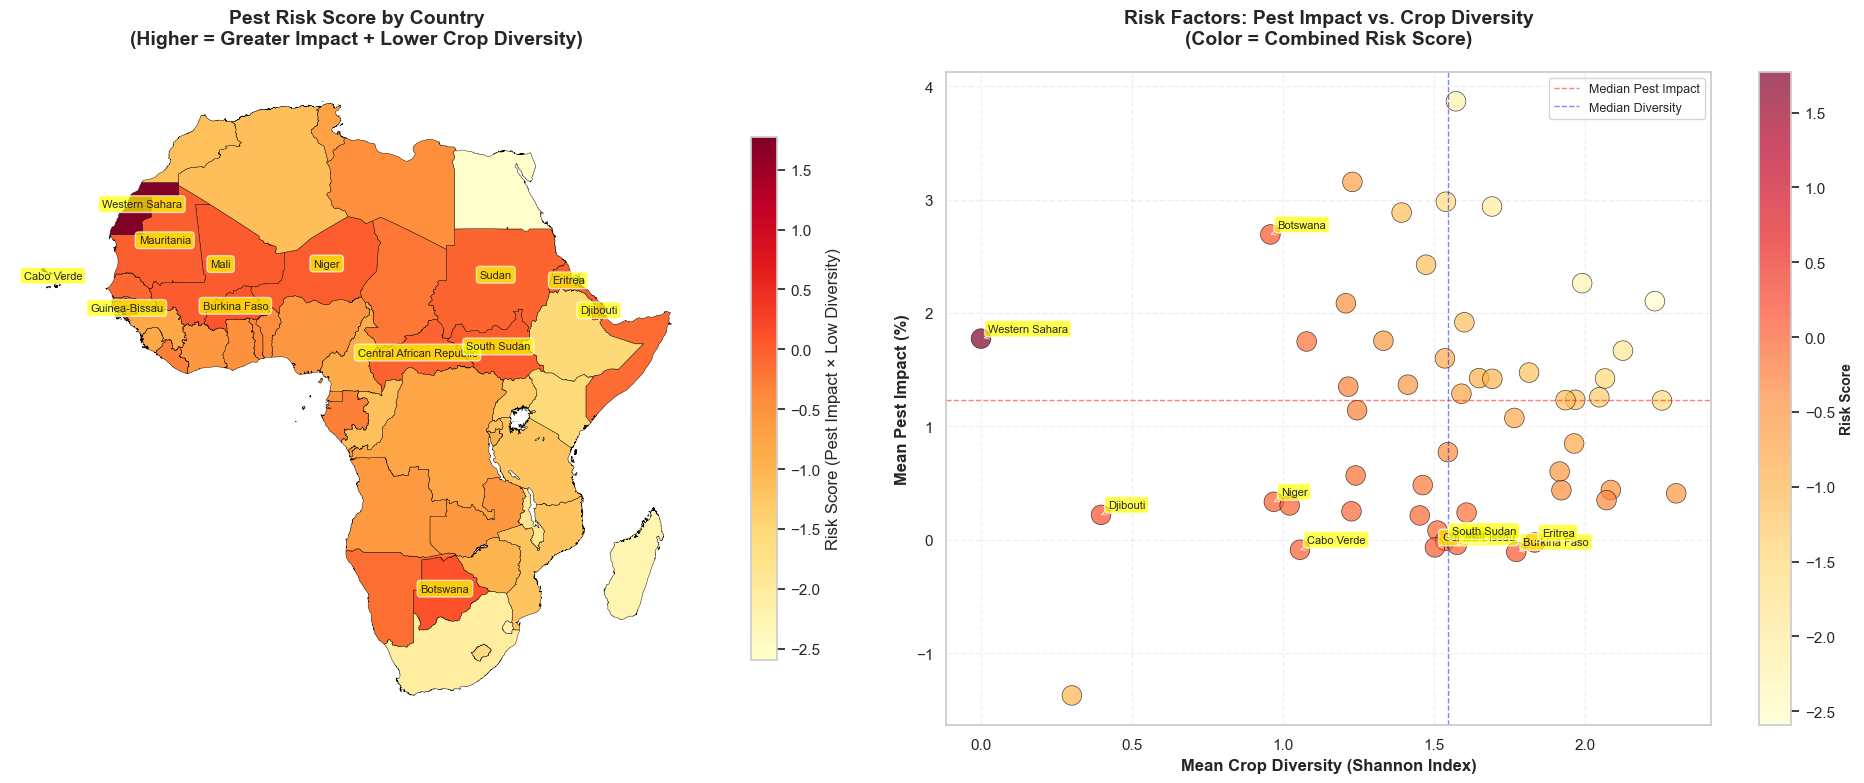

In [ ]:
###################
# PLOT 1: Geographic Risk Map with Pest Impact Overlay
###################

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Risk Score Map
combined.plot(
    column='risk_score',
    cmap='YlOrRd',
    legend=True,
    ax=ax1,
    edgecolor='black',
    linewidth=0.3,
    legend_kwds={
        'label': 'Risk Score (Pest Impact × Low Diversity)',
        'shrink': 0.8
    }
)
ax1.set_title('Pest Risk Score by Country\n(Higher = Greater Impact + Lower Crop Diversity)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.axis('off')

# Identify high-risk countries (top 25th percentile)
high_risk_threshold = combined['risk_score'].quantile(0.75)
high_risk = combined[combined['risk_score'] >= high_risk_threshold]

# Add country labels for high-risk areas
for idx, row in high_risk.iterrows():
    centroid = row.geometry.centroid
    ax1.annotate(
        row['admin0_name'],
        xy=(centroid.x, centroid.y),
        fontsize=8,
        ha='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7)
    )

# Plot 2: Dual Factor Analysis
sc = ax2.scatter(
    combined['mean_diversity'],
    combined['mean_pest_impact'],
    s=200,
    c=combined['risk_score'],
    cmap='YlOrRd',
    alpha=0.7,
    edgecolors='black',
    linewidth=0.5
)

# Add country labels for highest risk countries
top_risk = combined.nlargest(10, 'risk_score')
for idx, row in top_risk.iterrows():
    ax2.annotate(
        row['admin0_name'],
        xy=(row['mean_diversity'], row['mean_pest_impact']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=0.5)
    )

ax2.set_xlabel('Mean Crop Diversity (Shannon Index)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Mean Pest Impact (%)', fontsize=12, fontweight='bold')
ax2.set_title('Risk Factors: Pest Impact vs. Crop Diversity\n(Color = Combined Risk Score)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='--')

# Add colorbar
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Risk Score', fontsize=10, fontweight='bold')

# Add risk zone annotations
ax2.axhline(y=combined['mean_pest_impact'].median(), color='red', linestyle='--', 
            alpha=0.5, linewidth=1, label='Median Pest Impact')
ax2.axvline(x=combined['mean_diversity'].median(), color='blue', linestyle='--', 
            alpha=0.5, linewidth=1, label='Median Diversity')
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.show()

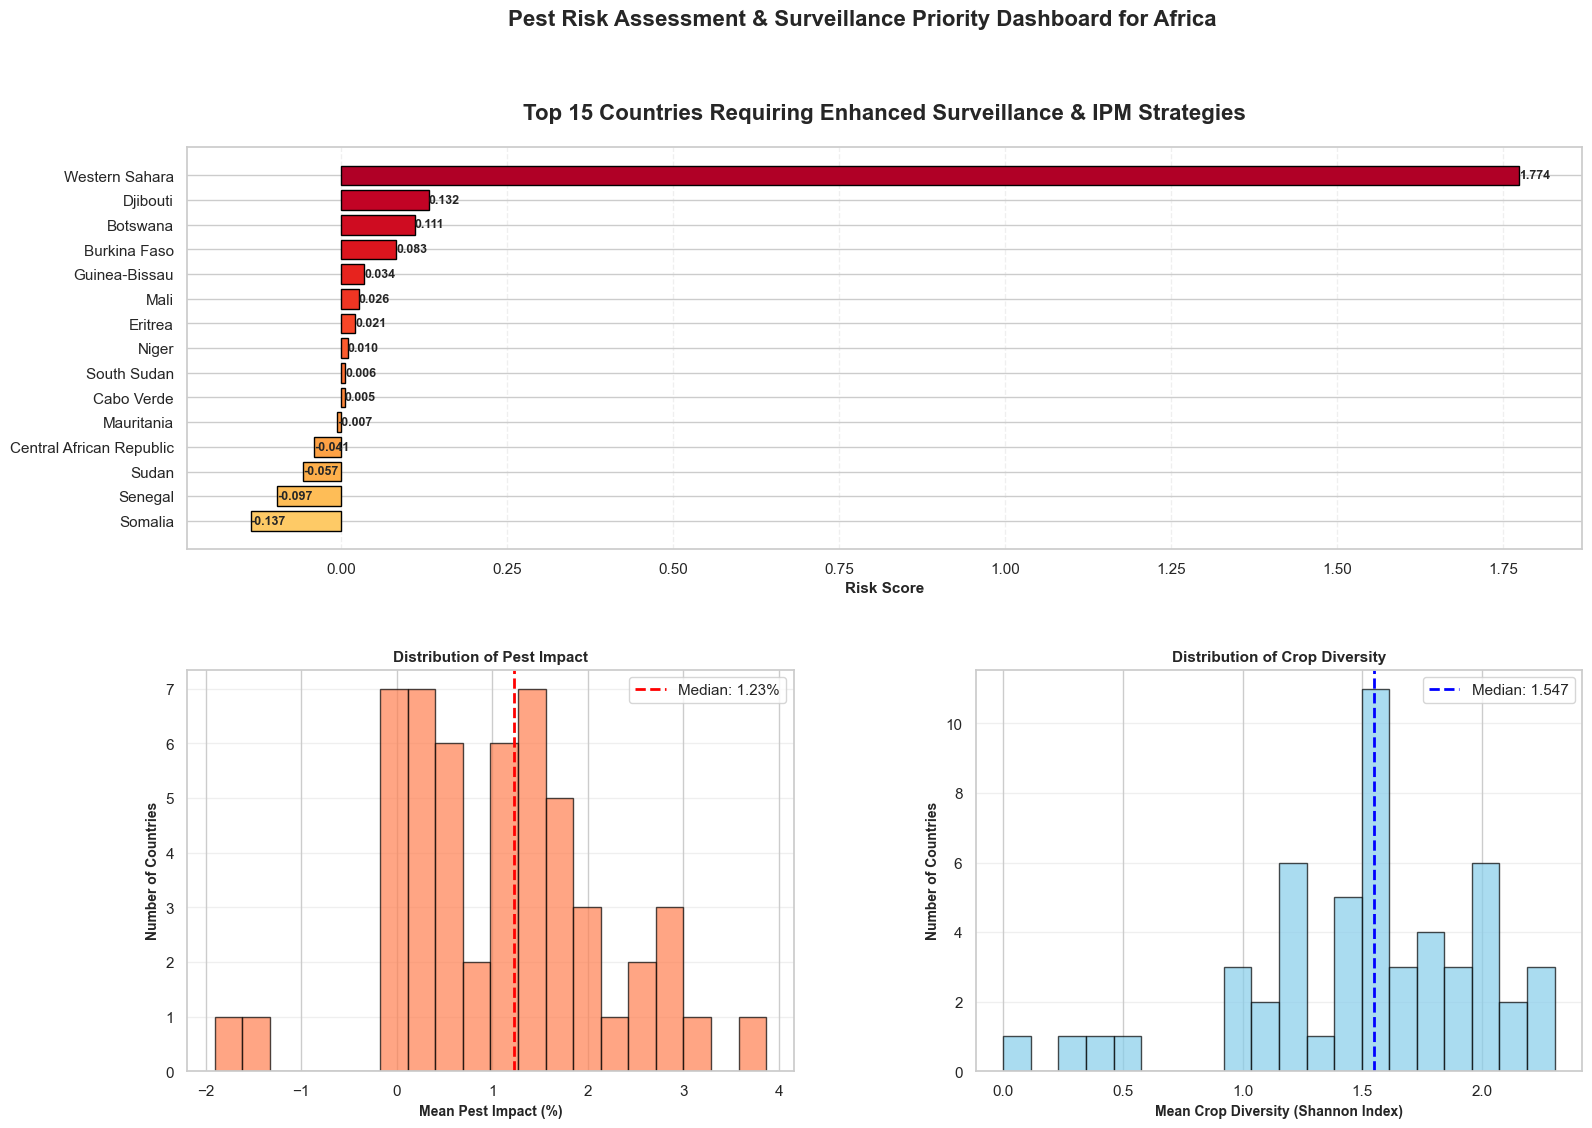

In [ ]:
###################
# PLOT 2: Priority Surveillance Dashboard
###################
# Create composite figure
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Top Risk Countries (Bar Chart)
ax1 = fig.add_subplot(gs[0, :])
top_15_risk = combined.nlargest(15, 'risk_score').sort_values('risk_score', ascending=True)
colors = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top_15_risk)))
bars = ax1.barh(top_15_risk['admin0_name'], top_15_risk['risk_score'], color=colors, edgecolor='black')
ax1.set_xlabel('Risk Score', fontsize=11, fontweight='bold')
ax1.set_title('Top 15 Countries Requiring Enhanced Surveillance & IPM Strategies', 
              fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_15_risk['risk_score'])):
    ax1.text(val, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', ha='left', fontsize=9, fontweight='bold')

# 3. Pest Impact Distribution
ax3 = fig.add_subplot(gs[1, 0])
ax3.hist(combined['mean_pest_impact'], bins=20, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(combined['mean_pest_impact'].median(), color='red', linestyle='--', 
            linewidth=2, label=f'Median: {combined["mean_pest_impact"].median():.2f}%')
ax3.set_xlabel('Mean Pest Impact (%)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Number of Countries', fontsize=10, fontweight='bold')
ax3.set_title('Distribution of Pest Impact', fontsize=11, fontweight='bold')
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Diversity Distribution
ax4 = fig.add_subplot(gs[1, 1])
ax4.hist(combined['mean_diversity'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax4.axvline(combined['mean_diversity'].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Median: {combined["mean_diversity"].median():.3f}')
ax4.set_xlabel('Mean Crop Diversity (Shannon Index)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Number of Countries', fontsize=10, fontweight='bold')
ax4.set_title('Distribution of Crop Diversity', fontsize=11, fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

plt.suptitle('Pest Risk Assessment & Surveillance Priority Dashboard for Africa', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

In [ ]:
# Pretty formatted table with conclusion
print("\n" + "="*100)
print("CONCLUSION".center(100))
print("="*100)
print("\nCountries with high pest impact and monoculture-dominated agriculture are emerging hotspots")
print("requiring urgent investment in surveillance infrastructure, early warning systems, and")
print("diversified IPM strategies to counter climate-driven pest habitat expansion.\n")
print("="*100)
print("RECOMMENDED ACTIONS FOR PEST MANAGEMENT".center(100))
print("="*100)
print(f"\n{'Priority Level':<25} | {'Action Required':<70}")
print("-"*100)
print(f"{'Top 5-10 Countries':<25} | {'Real-time monitoring, early warning systems, immediate IPM strategy changes':<70}")
print(f"{'Top 11-15 Countries':<25} | {'Enhanced surveillance, region-specific IPM protocols':<70}")
print(f"{'Above Median Risk':<25} | {'Preventive monitoring, crop diversification programs':<70}")
print("="*100 + "\n")


                                             CONCLUSION                                             

Countries with high pest impact and monoculture-dominated agriculture are emerging hotspots
requiring urgent investment in surveillance infrastructure, early warning systems, and
diversified IPM strategies to counter climate-driven pest habitat expansion.

                              RECOMMENDED ACTIONS FOR PEST MANAGEMENT                               

Priority Level            | Action Required                                                       
----------------------------------------------------------------------------------------------------
Top 5-10 Countries        | Real-time monitoring, early warning systems, immediate IPM strategy changes
Top 11-15 Countries       | Enhanced surveillance, region-specific IPM protocols                  
Above Median Risk         | Preventive monitoring, crop diversification programs                  



In [ ]:
# ============================================
# Question-4
# ============================================
# Cell 1: Process Scenario Data
if 'scenario' in pest_df.columns:
    ssp_data = pest_df[pest_df['scenario'].isin(['SSP245', 'SSP585', 'ssp245', 'ssp585'])]
    
    scenario_comparison = ssp_data.groupby(['admin0_name', 'scenario'])['value'].mean().reset_index()
    scenario_comparison.rename(columns={'value': 'mean_pest_impact'}, inplace=True)
    
    scenario_pivot = scenario_comparison.pivot(index='admin0_name', 
                                                columns='scenario', 
                                                values='mean_pest_impact').reset_index()
    
    scenario_cols = [col for col in scenario_pivot.columns if col.lower() in ['ssp245', 'ssp585']]
    if len(scenario_cols) == 2:
        scenario_pivot['impact_increase'] = scenario_pivot[scenario_cols[1]] - scenario_pivot[scenario_cols[0]]
        scenario_pivot['percent_change'] = (scenario_pivot['impact_increase'] / scenario_pivot[scenario_cols[0]]) * 100
    
    print(scenario_pivot.head(10))
else:
    print("No scenario column found in dataset")

scenario               admin0_name    ssp245    ssp585  impact_increase  \
0                          Algeria  2.689717  3.082727         0.393010   
1                           Angola  1.613581  1.896587         0.283006   
2                            Benin  0.384921  0.487451         0.102530   
3                         Botswana  2.509868  2.876063         0.366195   
4                     Burkina Faso -0.161579 -0.053471         0.108108   
5                          Burundi  1.294280  1.556669         0.262389   
6                       Cabo Verde -0.146468 -0.031382         0.115086   
7                         Cameroon  1.507219  1.692276         0.185056   
8         Central African Republic  0.033153  0.127246         0.094093   
9                             Chad  0.419196  0.544175         0.124979   

scenario  percent_change  
0              14.611578  
1              17.539010  
2              26.636639  
3              14.590189  
4             -66.907019  
5           

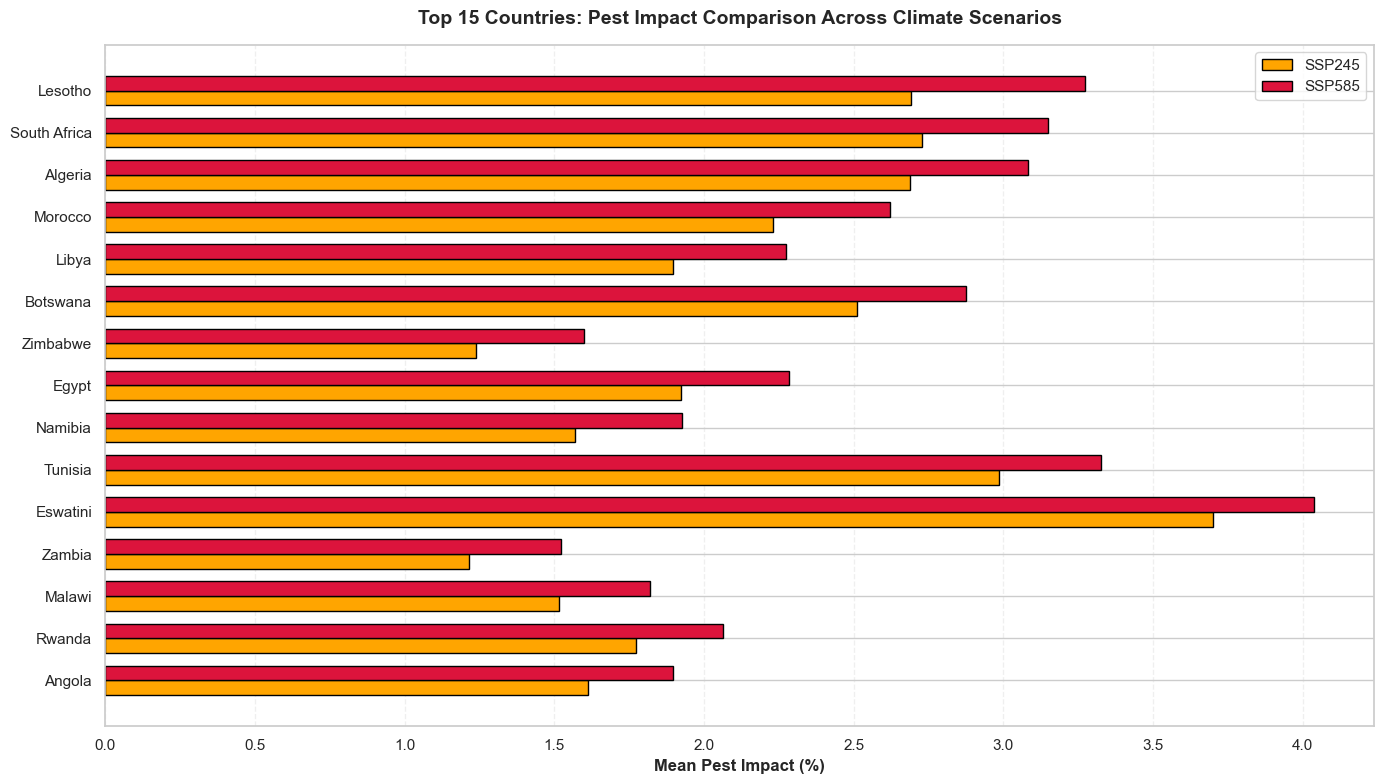

In [ ]:
# Cell 4: Plot 1 - Bar Chart Comparison
if 'scenario' in pest_df.columns and len(scenario_cols) == 2:
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    top_increase = scenario_pivot.nlargest(15, 'impact_increase').sort_values('impact_increase', ascending=True)
    
    x = np.arange(len(top_increase))
    width = 0.35
    
    bars1 = ax.barh(x - width/2, top_increase[scenario_cols[0]], width, 
                     label=scenario_cols[0].upper(), color='#FFA500', edgecolor='black')
    bars2 = ax.barh(x + width/2, top_increase[scenario_cols[1]], width, 
                     label=scenario_cols[1].upper(), color='#DC143C', edgecolor='black')
    
    ax.set_yticks(x)
    ax.set_yticklabels(top_increase['admin0_name'])
    ax.set_xlabel('Mean Pest Impact (%)', fontsize=12, fontweight='bold')
    ax.set_title('Top 15 Countries: Pest Impact Comparison Across Climate Scenarios', 
                  fontsize=14, fontweight='bold', pad=15)
    ax.legend(fontsize=11)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()

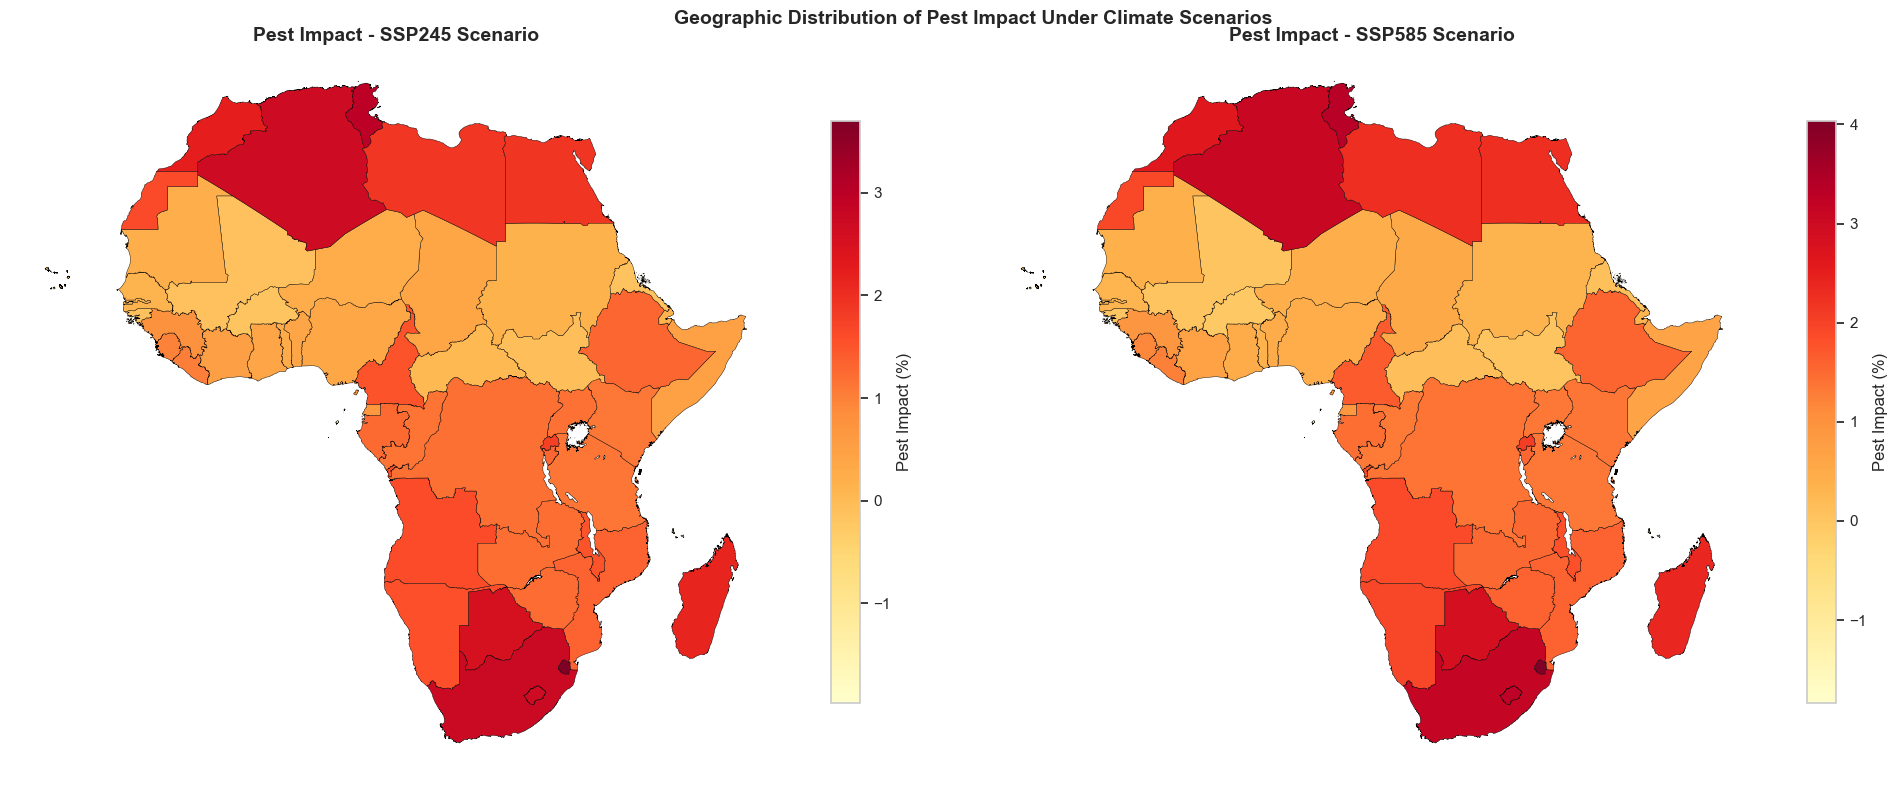

In [ ]:
# Cell 5: Plot 2 - Geographic Maps
if 'scenario' in pest_df.columns and len(scenario_cols) == 2:
    
    scenario_pivot_geo = admin0.merge(scenario_pivot, on='admin0_name', how='inner')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # SSP245
    scenario_pivot_geo.plot(
        column=scenario_cols[0],
        cmap='YlOrRd',
        legend=True,
        ax=ax1,
        edgecolor='black',
        linewidth=0.3,
        legend_kwds={'label': 'Pest Impact (%)', 'shrink': 0.8}
    )
    ax1.set_title(f'Pest Impact - {scenario_cols[0].upper()} Scenario', 
                  fontsize=14, fontweight='bold', pad=5)
    ax1.axis('off')
    
    # SSP585
    scenario_pivot_geo.plot(
        column=scenario_cols[1],
        cmap='YlOrRd',
        legend=True,
        ax=ax2,
        edgecolor='black',
        linewidth=0.3,
        legend_kwds={'label': 'Pest Impact (%)', 'shrink': 0.8}
    )
    ax2.set_title(f'Pest Impact - {scenario_cols[1].upper()} Scenario', 
                  fontsize=14, fontweight='bold', pad=5)
    ax2.axis('off')
    
    plt.suptitle('Geographic Distribution of Pest Impact Under Climate Scenarios', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

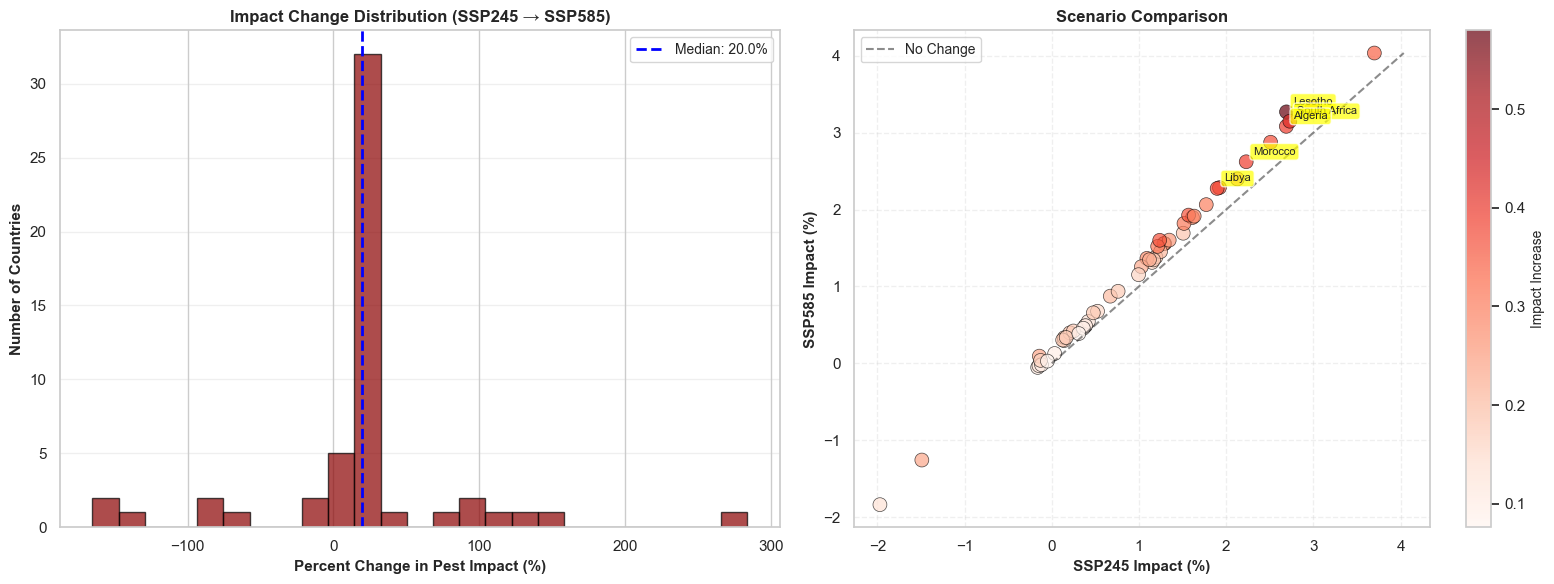

In [ ]:
# Cell 6: Plot 3 - Change Analysis
if 'scenario' in pest_df.columns and len(scenario_cols) == 2:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram
    ax1.hist(scenario_pivot['percent_change'].dropna(), bins=25, 
             color='darkred', edgecolor='black', alpha=0.7)
    ax1.axvline(scenario_pivot['percent_change'].median(), color='blue', 
                linestyle='--', linewidth=2, 
                label=f'Median: {scenario_pivot["percent_change"].median():.1f}%')
    ax1.set_xlabel('Percent Change in Pest Impact (%)', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Number of Countries', fontsize=11, fontweight='bold')
    ax1.set_title(f'Impact Change Distribution ({scenario_cols[0].upper()} → {scenario_cols[1].upper()})', 
                  fontsize=12, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(axis='y', alpha=0.3)
    
    # Scatter plot
    scatter = ax2.scatter(scenario_pivot[scenario_cols[0]], 
                         scenario_pivot[scenario_cols[1]], 
                         c=scenario_pivot['impact_increase'],
                         cmap='Reds', s=100, alpha=0.7, edgecolors='black', linewidth=0.5)
    
    max_val = max(scenario_pivot[scenario_cols[0]].max(), scenario_pivot[scenario_cols[1]].max())
    ax2.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1.5, label='No Change')
    
    top_changers = scenario_pivot.nlargest(5, 'impact_increase')
    for idx, row in top_changers.iterrows():
        ax2.annotate(row['admin0_name'], 
                    xy=(row[scenario_cols[0]], row[scenario_cols[1]]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    ax2.set_xlabel(f'{scenario_cols[0].upper()} Impact (%)', fontsize=11, fontweight='bold')
    ax2.set_ylabel(f'{scenario_cols[1].upper()} Impact (%)', fontsize=11, fontweight='bold')
    ax2.set_title('Scenario Comparison', fontsize=12, fontweight='bold')
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Impact Increase', fontsize=10)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Cell 7: Summary Statistics
if 'scenario' in pest_df.columns and len(scenario_cols) == 2:
    print("\n" + "="*100)
    print("KEY FINDINGS: PEST PATTERNS UNDER CLIMATE SCENARIOS".center(100))
    print("="*100)
    
    print(f"\n1. OVERALL IMPACT CHANGE ({scenario_cols[0].upper()} → {scenario_cols[1].upper()}):")
    print(f"   • Average increase: {scenario_pivot['impact_increase'].mean():.2f} percentage points")
    print(f"   • Median percent change: {scenario_pivot['percent_change'].median():.1f}%")
    print(f"   • Countries with >10% increase: {(scenario_pivot['percent_change'] > 10).sum()}")
    
    print(f"\n2. MOST VULNERABLE COUNTRIES (Highest Impact Increase):")
    top_5_increase = scenario_pivot.nlargest(5, 'impact_increase')
    for i, row in top_5_increase.iterrows():
        print(f"   • {row['admin0_name']}: +{row['impact_increase']:.2f}% ({row['percent_change']:.1f}% increase)")
    
    print(f"\n3. HIGHEST ABSOLUTE IMPACT UNDER {scenario_cols[1].upper()}:")
    top_5_absolute = scenario_pivot.nlargest(5, scenario_cols[1])
    for i, row in top_5_absolute.iterrows():
        print(f"   • {row['admin0_name']}: {row[scenario_cols[1]]:.2f}%")

    
    print('\n4. REQUIRED ACTIONS:')
    print(f'   -- Climate-adaptive IPM strategies tailored to warming patterns')
    print(f'   -- Enhanced surveillance for emerging pest species')
    print(f'   -- Investment in heat-resistant crops and biological control')
    
    print("="*100)


                        KEY FINDINGS: PEST PATTERNS UNDER CLIMATE SCENARIOS                         

1. OVERALL IMPACT CHANGE (SSP245 → SSP585):
   • Average increase: 0.23 percentage points
   • Median percent change: 20.0%
   • Countries with >10% increase: 44

2. MOST VULNERABLE COUNTRIES (Highest Impact Increase):
   • Lesotho: +0.58% (21.5% increase)
   • South Africa: +0.42% (15.4% increase)
   • Algeria: +0.39% (14.6% increase)
   • Morocco: +0.39% (17.6% increase)
   • Libya: +0.38% (20.0% increase)

3. HIGHEST ABSOLUTE IMPACT UNDER SSP585:
   • Eswatini: 4.04%
   • Tunisia: 3.33%
   • Lesotho: 3.27%
   • South Africa: 3.15%
   • Algeria: 3.08%

4. REQUIRED ACTIONS:
   -- Climate-adaptive IPM strategies tailored to warming patterns
   -- Enhanced surveillance for emerging pest species
   -- Investment in heat-resistant crops and biological control
